In [1]:
import pickle
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [2]:
path = 'Price.txt'
df = pd.read_csv(path)
data = pd.read_csv(path, parse_dates=['date'], index_col='date')

2023-03-01    7040.140270
2023-04-01    6701.164571
2023-05-01    6441.059369
2023-06-01    6221.780540
2023-07-01    6028.592014
2023-08-01    5853.936235
Freq: MS, dtype: float64
2023-03-01    8676.859730
2023-04-01    9015.835429
2023-05-01    9275.940631
2023-06-01    9495.219460
2023-07-01    9688.407986
2023-08-01    9863.063765
Freq: MS, dtype: float64


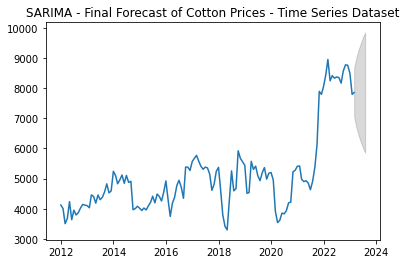

In [3]:
n_periods = 6
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
print(lower_series)
print(upper_series)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Cotton Prices - Time Series Dataset")
plt.show()